# Summary & comparison of models

Cel:
- zebrać wyniki z `reports/`
- porównać modele w jednej tabeli
- zrobić wykresy: Macro F1 oraz Recall(spam)
- zapisać `reports/final_results.csv`

In [15]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

REPO_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
REPORTS_DIR = REPO_ROOT / "reports"

baseline_path = REPORTS_DIR / "baseline_results.csv"
nn_path = REPORTS_DIR / "nn_results.csv"
tr_path = REPORTS_DIR / "transformer_results.csv"

baseline_path, nn_path, tr_path

(PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/reports/baseline_results.csv'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/reports/nn_results.csv'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/reports/transformer_results.csv'))

In [16]:
assert baseline_path.exists(), f"Brak: {baseline_path}"
assert nn_path.exists(), f"Brak: {nn_path}"
assert tr_path.exists(), f"Brak: {tr_path}"

baseline_df = pd.read_csv(baseline_path)
nn_df = pd.read_csv(nn_path)
tr_df = pd.read_csv(tr_path)

baseline_df.head(), nn_df.head(), tr_df.head()

(                                  model  accuracy  precision_spam  \
 0           TF-IDF(char_wb) + LinearSVC  0.991928        1.000000   
 1  TF-IDF(char_wb) + LogisticRegression  0.990135        0.992857   
 2              TF-IDF(word) + LinearSVC  0.988341        0.978873   
 3     TF-IDF(word) + LogisticRegression  0.982960        0.945205   
 
    recall_spam   f1_spam  macro_f1  
 0     0.939597  0.968858  0.982111  
 1     0.932886  0.961938  0.978135  
 2     0.932886  0.955326  0.974311  
 3     0.926174  0.935593  0.962887  ,
                 model  accuracy  precision_spam  recall_spam   f1_spam  \
 0  BiLSTM (Embedding)   0.98296        0.964286      0.90604  0.934256   
 
    macro_f1  
 0  0.962234  ,
                      model  accuracy  precision_spam  recall_spam   f1_spam  \
 0  DistilBERT (fine-tuned)  0.991928        0.979452     0.959732  0.969492   
 
    macro_f1  
 0   0.98242  )

In [17]:
cols = ["model", "accuracy", "precision_spam", "recall_spam", "f1_spam", "macro_f1"]

baseline_df = baseline_df[cols].copy()
nn_df = nn_df[cols].copy()
tr_df = tr_df[cols].copy()

all_df = pd.concat([baseline_df, nn_df, tr_df], ignore_index=True)

# zaokrąglenie do czytelności
all_df_round = all_df.copy()
for c in cols[1:]:
    all_df_round[c] = all_df_round[c].astype(float).round(6)

all_df_round.sort_values("macro_f1", ascending=False)

,model,accuracy,precision_spam,recall_spam,f1_spam,macro_f1
5,DistilBERT (fine-tuned),0.991928,0.979452,0.959732,0.969492,0.982420
0,TF-IDF(char_wb) + LinearSVC,0.991928,1.000000,0.939597,0.968858,0.982111
1,TF-IDF(char_wb) + LogisticRegression,0.990135,0.992857,0.932886,0.961938,0.978135
2,TF-IDF(word) + LinearSVC,0.988341,0.978873,0.932886,0.955326,0.974311
3,TF-IDF(word) + LogisticRegression,0.982960,0.945205,0.926174,0.935593,0.962887
4,BiLSTM (Embedding),0.982960,0.964286,0.906040,0.934256,0.962234


In [18]:
rank_df = all_df_round.sort_values("macro_f1", ascending=False).reset_index(drop=True)

best_overall = rank_df.iloc[0]
best_recall = rank_df.sort_values("recall_spam", ascending=False).iloc[0]

print("Best overall (by macro_f1):")
print(best_overall.to_dict())

print("\nBest recall for spam:")
print(best_recall.to_dict())

rank_df

Best overall (by macro_f1):
{'model': 'DistilBERT (fine-tuned)', 'accuracy': 0.991928, 'precision_spam': 0.979452, 'recall_spam': 0.959732, 'f1_spam': 0.969492, 'macro_f1': 0.98242}

Best recall for spam:
{'model': 'DistilBERT (fine-tuned)', 'accuracy': 0.991928, 'precision_spam': 0.979452, 'recall_spam': 0.959732, 'f1_spam': 0.969492, 'macro_f1': 0.98242}


,model,accuracy,precision_spam,recall_spam,f1_spam,macro_f1
0,DistilBERT (fine-tuned),0.991928,0.979452,0.959732,0.969492,0.982420
1,TF-IDF(char_wb) + LinearSVC,0.991928,1.000000,0.939597,0.968858,0.982111
2,TF-IDF(char_wb) + LogisticRegression,0.990135,0.992857,0.932886,0.961938,0.978135
3,TF-IDF(word) + LinearSVC,0.988341,0.978873,0.932886,0.955326,0.974311
4,TF-IDF(word) + LogisticRegression,0.982960,0.945205,0.926174,0.935593,0.962887
5,BiLSTM (Embedding),0.982960,0.964286,0.906040,0.934256,0.962234


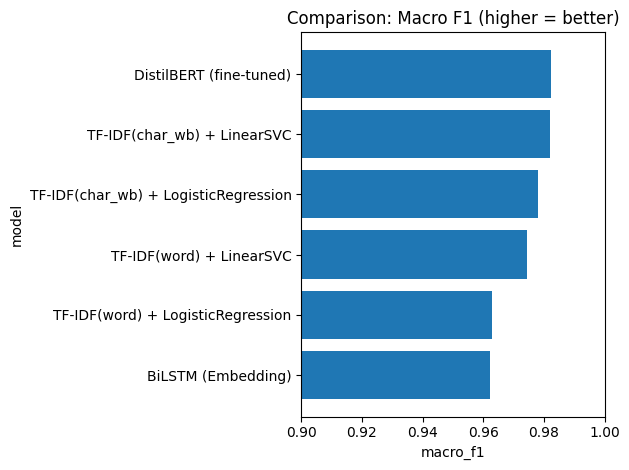

In [19]:
plot_df = rank_df.sort_values("macro_f1", ascending=True)

plt.figure()
plt.barh(plot_df["model"], plot_df["macro_f1"])
plt.title("Comparison: Macro F1 (higher = better)")
plt.xlabel("macro_f1")
plt.ylabel("model")
plt.xlim(0.9, 1.0)
plt.tight_layout()
plt.show()

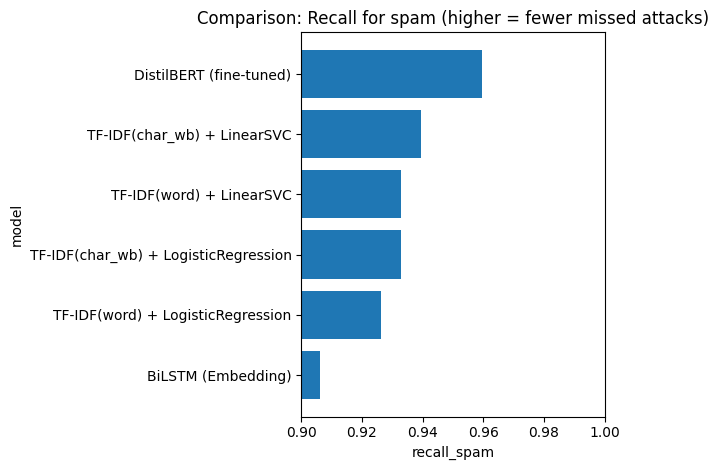

In [20]:
plot_df = rank_df.sort_values("recall_spam", ascending=True)

plt.figure()
plt.barh(plot_df["model"], plot_df["recall_spam"])
plt.title("Comparison: Recall for spam (higher = fewer missed attacks)")
plt.xlabel("recall_spam")
plt.ylabel("model")
plt.xlim(0.9, 1.0)
plt.tight_layout()
plt.show()

In [21]:
out_path = REPORTS_DIR / "final_results.csv"
rank_df.to_csv(out_path, index=False)
out_path

PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/reports/final_results.csv')

## Obserwacje

- Najlepszy wynik ogólny (macro F1) uzyskał model: **DistilBERT**
- Dla bezpieczeństwa kluczowy jest wysoki recall(spam) — model o najwyższym recall to: **DistilBERT**
- Model TF-IDF(char_wb)+LinearSVC stanowi bardzo mocny baseline dla krótkich wiadomości SMS.
- Sieć uczona od zera (BiLSTM) jest słabsza, co jest typowe dla małych zbiorów danych i braku wiedzy wstępnej (brak pretrainingu).
- Transformer (DistilBERT) daje najlepszą generalizację i najwyższy recall, redukując liczbę false negatives.